In [235]:
%matplotlib inline

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.util import img_as_uint

In [237]:
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)

In [238]:
from skimage import morphology
from scipy import ndimage as ndi
from skimage.color import rgb2gray
from skimage.color import rgba2rgb
from skimage.filters import gaussian
from skimage.segmentation import active_contour

In [239]:
import os

In [240]:
filename = os.path.join(r'C:\Users\Dell\Documents\COURSE 1\PROJEKT\code\test_set', '4-35-4.png')

In [241]:
filename

'C:\\Users\\Dell\\Documents\\COURSE 1\\PROJEKT\\code\\test_set\\4-35-4.png'

In [242]:
 from skimage import io

In [243]:
deer = io.imread(filename)

In [204]:
deer.shape

(3025, 2812, 3)

In [251]:
deer_float = img_as_float(deer)

In [40]:
#out = img_as_uint(deer_float)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


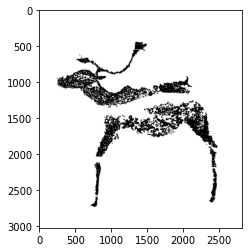

In [ ]:
#plt.imshow(out)

In [267]:
from skimage.transform import rescale
image = deer
min_deer = rescale(image, 0.2)


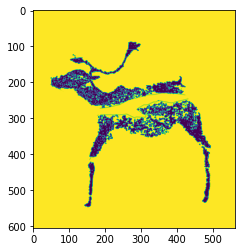

In [262]:
plt.imshow(min_deer)

In [268]:
min_deer.shape

(605, 562, 1)

In [264]:
min_deer_float = img_as_float(min_deer)

In [21]:
#RGBA to RGB

img_rgba = deer
deer_rgb = rgba2rgb(img_rgba)
plt.imshow(deer_rgb)
deer_rgb.shape

ValueError: the input array must have size 4 along `channel_axis`, got (3025, 2812, 3)

In [247]:
#RGB to gray
deer_gray = rgb2gray(min_deer)
plt.imshow(deer_gray)
deer_gray.shape

ValueError: the input array must have size 3 along `channel_axis`, got (605, 562, 1)

Text(0.5, 1.0, 'Morphological ACWE evolution')

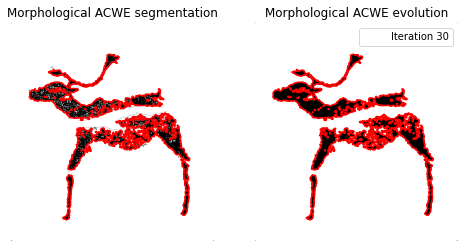

In [100]:
def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE
deer_float = img_as_float(deer_gray)

# Initial level set
init_ls = checkerboard_level_set(deer_float.shape, 5)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(deer_float, num_iter=30, init_level_set=init_ls,
                             smoothing=10, iter_callback=callback)

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(deer_float, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()

contour = ax[1].contour(evolution[-5], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 30")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

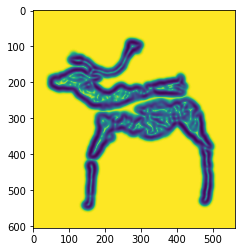

In [248]:
deer_float = img_as_float(min_deer)
gimage = inverse_gaussian_gradient(deer_float, alpha=100.0, sigma=5.0)
plt.imshow(gimage)

In [265]:
#deer_float = img_as_float(deer_gray)
#gimage = inverse_gaussian_gradient(deer_float, alpha=100.0, sigma=5.0)

# Initial level set
init_ls = np.zeros(min_deer.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_geodesic_active_contour(min_deer_float, 
                                           num_iter=500,
                                           init_level_set=init_ls,
                                           smoothing=2, 
                                           balloon=-1,
                                           threshold=0.65,
                                           iter_callback=callback)

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(min_deer_float, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.65], colors='r')
ax[0].set_title("Morphological GAC segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()


contour = ax[1].contour(evolution[300], [0.65], colors='y')
contour.collections[0].set_label("Iteration 300")
contour = ax[1].contour(evolution[500], [0.65], colors='r')
contour.collections[0].set_label("Iteration 500")

ax[1].legend(loc="upper right")
title = "Morphological GAC evolution"
ax[1].set_title(title, fontsize=12)


ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

In [167]:
#сохранение в png
a = fig.savefig('deer1')

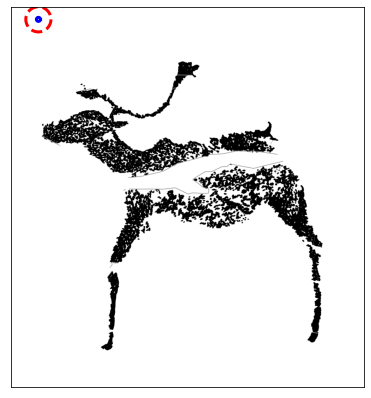

In [ ]:
#CANNY
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature


# Generate noisy image of a square
image = np.zeros((128, 128), dtype=float)
image[32:-32, 32:-32] = 1

image = ndi.rotate(image, 15, mode='constant')
image = ndi.gaussian_filter(image, 4)
image = random_noise(image, mode='speckle', mean=0.1)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()